In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import classification_report


In [33]:
data0=pd.read_csv("DataSet.csv")
data0.head(5)

,url_length,tiny_url,pref_suf,https_token,iframe,anchor_tag,Favicon,SFH,requestURL,LinksInTags,label
0,34,1,1,0,1,1.000000,1,0,1.0,1.000000,1
1,40,1,1,1,1,1.000000,1,0,1.0,0.666667,0
2,48,1,1,1,1,1.000000,1,1,1.0,0.777778,0
3,33,1,1,1,1,0.948276,1,0,1.0,0.827586,0
4,66,1,1,0,1,0.000000,1,1,0.0,0.000000,0


In [34]:
y=data0['label']
x=data0.drop('label',axis=1)
x.shape, y.shape

((63136, 10), (63136,))

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape , x_test.shape

((47352, 10), (15784, 10))

In [36]:
tab=[]

# XGBoost

In [37]:
from  xgboost  import XGBClassifier

module1=XGBClassifier(learning_rate=0.4,max_depth=7)

tab.append(('xgb',module1))


# random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
 
module3 = RandomForestClassifier(max_depth = 5)

tab.append(('rf',module3))

# k-Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

module4=KNeighborsClassifier(n_neighbors=5)

tab.append(('knn',module4))

#  HYBRID MODEL

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier


model_hybrid = StackingClassifier(tab, MLPClassifier(hidden_layer_sizes=(100,100,100)))
# model_hybrid=make_pipeline(StandardScaler(),model)
model_hybrid.fit(x_train, y_train)

y_pred = model_hybrid.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

from sklearn.metrics import matthews_corrcoef
print(f"MCC = {matthews_corrcoef(y_true=y_test,y_pred=y_pred)}")


import winsound
winsound.PlaySound("SystemAsterisk", winsound.SND_ALIAS)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9263
           1       0.87      0.87      0.87      6521

    accuracy                           0.89     15784
   macro avg       0.89      0.89      0.89     15784
weighted avg       0.89      0.89      0.89     15784

MCC = 0.7763881613973777


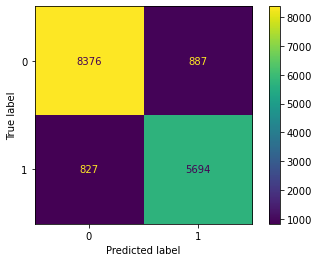

In [42]:
import matplotlib.pyplot  as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_hybrid.classes_)
dis.plot()
plt.show()

In [43]:
import pickle
pickle.dump(model_hybrid, open("hybrid1.pickle.dat", "wb"))

In [44]:
from Detection import FeaturesExtraction
import requests
import numpy as np

url=input("donner un lien : ")
result=" RIEN "
try:
    
    response=requests.get(url,timeout=5)
    print("get requests !!!")
    lien=FeaturesExtraction(url,response)
    # features_names=['url_length','tiny_url','pref_suf','https_token','iframe','anchor_tag','Favicon','SFH','requestURL','LinksInTags']
    # l=pd.DataFrame(lien,columns=features_names)
    print(lien)
    lien=np.array(lien).reshape(1,-1)

    if int(model_hybrid.predict(lien))==0:
        result="phishing"
    else:
        result="legitimate"

except Exception as e:
    print(f'ERROR TO GET : {url}')

print (f'la resultat de lien {url} est {result}')

get requests !!!
[57, 1, 1, 1, 1, 0.8120300751879699, 0, 0, 0.0, 0.06818181818181818]
la resultat de lien https://github.com/scikit-learn/scikit-learn/issues/21577 est phishing


c:\Users\karim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\karim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
